# SVM 이론

## 결정 함수와 예측

선형 SVM 분류기 모델은 단순히 결정 함수 $\mathbf{w}^T \mathbf{x} + b = w_1x_1 + \dots + w_nx_x + b$ 를 계산해서 새로운 샘플 x를 예측

아래 [5-2] 참고

In [505]:
%matplotlib inline
from sklearn import datasets
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [506]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

In [507]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

C:\Anaconda3\envs\tf_pt\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [508]:
# 스케일되지 않은 파라미터로 변경
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기 (libsvm과 달리 liblinear 라이브러리에서 제공하지 않기 때문에 
# LinearSVC에는 서포트 벡터가 저장되어 있지 않습니다.)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

**식 5-2: 선형 SVM 분류기의 예측**

$
\hat{y} = \begin{cases}
 0 & \mathbf{w}^T \mathbf{x} + b < 0 \text{ 일 때}, \\
 1 & \mathbf{w}^T \mathbf{x} + b \geq 0 \text{ 일 때}
\end{cases}
$

**<그림 5-12. iris 데이터셋의 결정 함수> 생성 코드**

WTF : 도데체 아래 코드부터 시작하면 오류나고

처음부터 시작하면 오류가 안 나냐?

In [509]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

[그림 5-4] 오른쪽에 있는 모델의 결정함수가 아래 그래프에 나타나 있음.

특성이 2개이기에 2차원 평면임. 결정경계는 결정함수의 값이 0인 점들로 이루어져 있음.

이는 두 평면의 교차점으로 직선임(굵은 실선)

그림 저장: iris_3D_plot


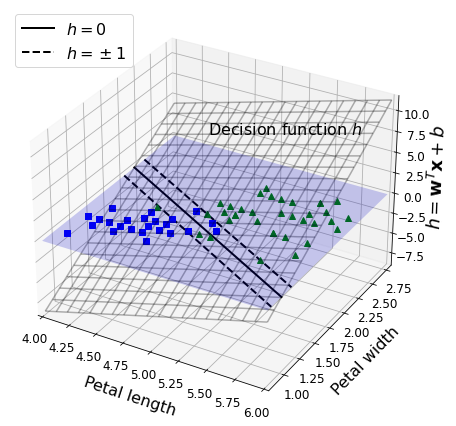

In [514]:
# from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=16)
    ax.set_xlabel(r"Petal length", fontsize=16, labelpad=10)
    ax.set_ylabel(r"Petal width", fontsize=16, labelpad=10)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18, labelpad=5)
    ax.legend(loc="upper left", fontsize=16)

fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

save_fig("iris_3D_plot")
plt.show()

**<그림 5-13. 가중치 벡터가 작을수록 마진은 커집니다> 생성 코드**

점선은 결정함수의 값이 1이나 -1인 점들. 이 선분들은 결정경계에 평행하고 어느정도의 떨어져 마진 형성.

선형 SVM 분류기 훈련 => 마진 오류를 발생시키지 않거나(하드마진) 제한적인 마진 오류를 가지면서

가능한 마진을 크게 하는 $w$ (가중치 벡터) 와 $b$ (편향) 를 찾는 것

## 목적 함수

결정함수의 기울기를 생각해보면 이는 가중치 벡터의 노름 $\left\|w\right\|$ 와 같음.

이 기울기를 2로 나누면 결정 함수의 값이 $±1$ 이 되는 점들이 결정경계로부터 2배만큼 더 멀어짐.

기울기 $\div$ 2 = 마진 $\times$ 2, 아래의 그래프와 같이 2차원으로 보면 이해하기 수월

가중치 벡터 $w$ 가 작을수록 마진은 커짐.

그림 저장: small_w_large_margin_plot


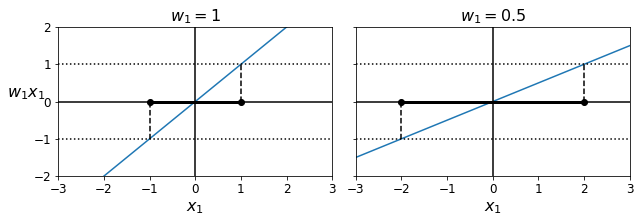

In [511]:
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

fig, axes = plt.subplots(ncols=2, figsize=(9, 3.2), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)
plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)
save_fig("small_w_large_margin_plot")
plt.show()

마진을 크게 하기 위해 $\left\|w\right\|$ 를 최소화하려함.

하드마진(마진 오류 하나도 허용 X)을 하려면 :

결정함수가 모든 양성 훈련샘플에서는 1보다 커야하고, 음성 훈련샘플에서는 -1보다 작아야함.

|

음성샘플($y^{(i)}=0$) 일 때 $t^{(i)}=-1$ 로, 양성샘플($y^{(i)}=1$) 일 때 $t^{(i)}=1$ 로

정의하면 앞서 말한 모든 제약조건을 모든 샘플에서 $t^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \ge 1$ 로

표현가능. -> 하드마진 선형SVM 분류기의 목적함수를 제약있는 최적화문제로 표현가능

In [512]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64) # Iris virginica

svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X, y)
svm_clf.predict([[5.3, 1.3]])

array([1.])

**식 5-3: 하드 마진 선형 SVM 분류기 목적 함수**

$\begin{split}
&\underset{\mathbf{w}, b}{\operatorname{minimize}}\quad{\frac{1}{2}\mathbf{w}^T \mathbf{w}} \\
&\text{subject to} \quad t^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \ge 1 \quad \text{for } i = 1, 2, \dots, m
\end{split}
$

|

$\left\|w\right\|$ 를 최소화하는 대신 $\mathbf{\frac{1}{2}}\left\|w\right\|$ 인 ${\frac{1}{2}\mathbf{w}^T \mathbf{w}}$ 를 최소화함.

실제로 $\mathbf{\frac{1}{2}}\left\|w\right\|$ 이 깔끔하고 간단하게 미분됨.

최적화 알고리즘은 미분할 수 있는 함수에서 잘 작동함.

|

소프트마진 분류기의 목적함수를 구성하려면 각 샘플에 대해 슬랙변수 $\quad \zeta^{(i)} \ge 0$ 을 도입해야함.

$\quad \zeta^{(i)} \ge 0$ i번째 샘플이 얼마나 마진을 위반할지 정함.

이 문제는 2개의 상충되는 목표를 가지고 있음. 

|

마진 오류를 최소화하기 위해 가능한 슬랙변수의 값을 작게 만드는 것과

마진을 크게 하기 위해 ${\frac{1}{2}\mathbf{w}^T \mathbf{w}}$ 를 가능한 한 작게 만드는 것

여기에 파라미터 C가 등장함 이 파라미터는 두 목표 사이의 트레이드오프를 정의.

결국 [5-4]에 있는 제약을 가진 최적화문제가 됨.

**식 5-4: 소프트 마진 선형 SVM 분류기 목적 함수**

$\begin{split}
&\underset{\mathbf{w}, b, \mathbf{\zeta}}{\operatorname{minimize}}\quad{\dfrac{1}{2}\mathbf{w}^T \mathbf{w} + C \sum\limits_{i=1}^m{\zeta^{(i)}}}\\
&\text{subject to} \quad t^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \ge 1 - \zeta^{(i)} \quad \text{and} \quad \zeta^{(i)} \ge 0 \quad \text{for } i = 1, 2, \dots, m
\end{split}
$

## 콰드라틱 프로그래밍 (Quadratic programming, QP)

하드마진과 소프트마진 문제는 모두 선형적인 제약 조건이 있는 볼록함수의 이차 최적화 문제.

QP 문제를 푸는 알고리즘이 많이 있으나 이 책의 범위를 벗어남.

**Equation 5-5: Quadratic Programming problem**

$
\begin{split}
\underset{\mathbf{p}}{\text{Minimize}} \quad & \dfrac{1}{2} \mathbf{p}^T \mathbf{H} \mathbf{p} \quad + \quad \mathbf{f}^T \mathbf{p}  \\
\text{subject to} \quad & \mathbf{A} \mathbf{p} \le \mathbf{b} \\
\text{where } &

\begin{cases}
  \mathbf{p} & \text{ is an }n_p\text{-dimensional vector (} n_p = \text{number of parameters),}\\
  \mathbf{H} & \text{ is an }n_p \times n_p \text{ matrix,}\\
  \mathbf{f} & \text{ is an }n_p\text{-dimensional vector,}\\
  \mathbf{A} & \text{ is an } n_c \times n_p \text{ matrix (}n_c = \text{number of constraints),}\\
  \mathbf{b} & \text{ is an }n_c\text{-dimensional vector.}
\end{cases}
\end{split}
$

식 $\mathbf{A} \mathbf{p} \le \mathbf{b}$ 는 $n_c$ 개의 제약을 정의.

$i=1,2,\dots,n_c$ 일 때 $p^Ta{(i)} \le b^{(i)}$ 인 제약이 있음.

여기서 $a^{(i)}$ 는 A의 i번째 행의 원소를 포함하는 벡터이고 $b{(i)}$ 는 b의 i번째 원소임.

|

다음과 같이 QP 파라미터를 지정하면 하드 마진을 갖는 선형 SVM 분류기의 목적함수를 간단하게 검증가능.

* $n_p=n+1$ 여기서 $n$ 은 특성 수임(편향 때문에 +1이 추가됨.).

* $n_p=m$ , 여기서 m은 훈련샘플 수임.

* $H$ 는 $n_p \times n_p$ 크기이고 왼쪽 맨 위의 원소가 0(편향을 제외하기 위해)인 것을 제외하고는 단위행렬

* $f=0$, 모두 0으로 채워진 $n_p$ 차원의 벡터임.

* $b=1$, 모두 1로 채워진 $n_c$ 차원의 벡터임.

* $a{(i)}=-t{(i)}x{(i)}$, 여기서 $x{(i)}$ 는 편향을 위해 특성 $x{(i)}=1$ 을 추가한 $x^{(i)}$ 와 같음

하드마진 선형 SVM 분류기를 훈련시키는 한 가지 방법은 이미 준비된 QP 알고리즘에 관련 파라미터를 전달하는 것.

결과 벡터 $p$ 편향 $b=p_0$ 와 특성 가중치 $w_i=p_i$ 을 담고있음.

비슷하게 소프트마진 문제세어서도 QP알고리즘을 사용가능(이 장의 마지막 연습문제 확인).

|

커널트릭을 사용하려면 제약이 있는 최적화문제를 다른 형태로 바꿔야 함.

## 쌍대 문제

원 문제라는 제약이 있는 최적화문제가 주어지면 쌍대문제라고 하는 깊게 관련된 다른 문제로 표현됨.

일반적으로 쌍대문제 해는 원문제의 해의 하한값이지만, 어떤 조건하에서는 원 문제와 똑같은 해 제공.

다행히도 SVM문제는 이 조건을 만족시킴. 따라서 방법을 선택해서 풀 수 있음.

[5-6]이 선형 SVM 목적 함수의 쌍대 형식.

**Equation 5-6: Dual form of the linear SVM objective**

$\begin{split}
\underset{\mathbf{\alpha}}{\operatorname{minimize}}
\dfrac{1}{2}\sum\limits_{i=1}^{m}{
  \sum\limits_{j=1}^{m}{
  \alpha^{(i)} \alpha^{(j)} t^{(i)} t^{(j)} {\mathbf{x}^{(i)}}^T \mathbf{x}^{(j)}
  }
} \quad - \quad \sum\limits_{i=1}^{m}{\alpha^{(i)}}\\
\text{subject to}\quad \alpha^{(i)} \ge 0 \quad \text{for }i = 1, 2, \dots, m
\end{split}
$

이 식을 최소화하는 벡터 $\hat \alpha$ 을 찾았다면 [5-7]을 사용해 원 문제의 식을 최소화하는 $\hat w$ 과 $\hat b$ 을 계산가능

**Equation 5-7: From the dual solution to the primal solution**

$\begin{split}
&\hat{\mathbf{w}} = \sum_{i=1}^{m}{\hat{\alpha}}^{(i)}t^{(i)}\mathbf{x}^{(i)}\\
&\hat{b} = \dfrac{1}{n_s}\sum\limits_{\scriptstyle i=1 \atop {\scriptstyle {\hat{\alpha}}^{(i)} > 0}}^{m}{\left(t^{(i)} - ({\hat{\mathbf{w}}}^T \mathbf{x}^{(i)})\right)}
\end{split}
$

훈련 샘플 수가 특성 개수보다 작을 때 원문제보다 쌍대문제를 푸는 것이 빠름.

더 중요한 것은 원 문제에서는 적용이 안 되는 커널 트릭을 가능케 함.

그렇다면 커널트릭은 뭔가?

## 커널 SVM

(moons 데이터셋 같은) 2차원 데이터셋에 2차 다항식 변환을 적용하고 선형 SVM 분류기를 

변환된 이 훈련 세트에 적용한다고 합시다. [5-8]은 우리가 적용하고자 하는 2차 다항식 매핑 함수 $\phi$ 임

**식 5-8: 2차 다항식 매핑**

$
\phi\left(\mathbf{x}\right) = 
$
$
\phi\left( \begin{pmatrix}
  x_1 \\
  x_2
\end{pmatrix} \right) = 
$
$\begin{pmatrix}
  {x_1}^2 \\
  \sqrt{2} \, x_1 x_2 \\
  {x_2}^2
\end{pmatrix}
$

|

변환된 벡터는 2차원이 아니고 3차원이 됨. 2개의 2차원 벡터 a와 b에 2차 다항식 매핑을 적용한 다음

벡터로 점곱을 하면 어떻게 되는지 삻펴봅시다.

|


**식 5-9: 2차 다항식 매핑을 위한 커널 트릭**

$\begin{split}
\phi(\mathbf{a})^T \phi(\mathbf{b}) & \quad = \begin{pmatrix}
  {a_1}^2 \\
  \sqrt{2} \, a_1 a_2 \\
  {a_2}^2
  \end{pmatrix}^T \begin{pmatrix}
  {b_1}^2 \\
  \sqrt{2} \, b_1 b_2 \\
  {b_2}^2
\end{pmatrix} = {a_1}^2 {b_1}^2 + 2 a_1 b_1 a_2 b_2 + {a_2}^2 {b_2}^2 \\
 & \quad = \left( a_1 b_1 + a_2 b_2 \right)^2 = \left( \begin{pmatrix}
  a_1 \\
  a_2
\end{pmatrix}^T \begin{pmatrix}
    b_1 \\
    b_2
  \end{pmatrix} \right)^2 = (\mathbf{a}^T \mathbf{b})^2
\end{split}
$

|

결과는 벡터의 점곱이 원래 벡터의 점곱의 제곱과 같음. 

$\phi(\mathbf{a})^T \phi(\mathbf{b}) = (\mathbf{a}^T \mathbf{b})^2
$

모든 훈련샘플에 변환 $\phi$ 를 적용하면 쌍대문제 [5-6]에 점곱 $\phi(x^{(i)})^T \phi(x^{(i)})$ 가 포함될 것.

하지만 $\phi$ 가 [5-8]에 정의된 2차 다항식 변환이라면 변환된 벡터의 점곱을 간단하게 $(x{(i)^T}x{(j)})^2$ 로

바꿀 수 있음. 그래서 실제로 훈련 샘플을 변환할 필요가 전혀 없음.

|

점곱을 제곱으로 바꾸기만 하면 됨. 절댓값은 실제로 훈련샘플을 어렵게 변환해서 선형 SVM 알고리즘을 

적용하는 것과 완전히 같음. 하지만 이 기법이 전체과정에 필요한 계산량 측면에서 훨씬 효율적.

바로 이것이 커널 트릭.

함수 $K(\mathbf{a}, \mathbf{b}) = (\mathbf{a}^T \mathbf{b})^2$ 을 2차 다항식 커널이라고 부름.

머신러닝에서 커널은 변환 $\phi$ 를 계산하지 않고(또는 $\phi$ 를 모르더라도) 원래 벡터 a와 b에 기반하여

점곱 $\phi(\mathbf{a})^T \phi(\mathbf{b})$ 를 계산할 수 있는 함수.

아래 가장 널리 사용되는 커널의 일부를 나열

**식 5-10: 일반적인 커널**

$\begin{split}
\text{선형:} & \quad K(\mathbf{a}, \mathbf{b}) = \mathbf{a}^T \mathbf{b} \\
\text{다항식:} & \quad K(\mathbf{a}, \mathbf{b}) = \left(\gamma \mathbf{a}^T \mathbf{b} + r \right)^d \\
\text{가우시안 RBF:} & \quad K(\mathbf{a}, \mathbf{b}) = \exp({\displaystyle -\gamma \left\| \mathbf{a} - \mathbf{b} \right\|^2}) \\
\text{시그모이드:} & \quad K(\mathbf{a}, \mathbf{b}) = \tanh\left(\gamma \mathbf{a}^T \mathbf{b} + r\right)
\end{split}
$

--------------------------------------------------------------------------------

**머서의 정리**

머서의 정리에 따르면 함수 $K(\mathbf{a}, \mathbf{b})$ 가 머서의 조건(예를 들어 $K$ 가 매개변수에 대해 연속, 대칭임.

즉, $K(\mathbf{a}, \mathbf{b}) = K(\mathbf{b}, \mathbf{a})$ 등)이라 부르는 몇 개 수학적 조건을 만족할 때

a와 b를(더 높은 차원의) 다른공간에 매핑하는 $K(\mathbf{a}, \mathbf{b}) = \phi(\mathbf{a})^T \phi(\mathbf{b})$ 와 같은 함수 $\phi$ 가 존재함. 

그래서 $\phi$ 를 모르더라도 $\phi$ 가 존재하는 것을 알기 때문에 $K$ 를 커널로 사용할 수 있음.

|

가우시안 RBF 커널의 경우 $\phi$ 는 각 훈련샘플을 무한 차원의 공간에 매핑하는 것으로 볼 수 있음.

따라서 매핑하지 않는 것이 다행.

|

자주 사용하는 일부 커널(시그모이드 커널)은 머서의 조건을 모두 따르지는 않지나 일반적으로 실전에서는 잘 작동.

--------------------------------------------------------------------------------

아직 매듭짓지 못한 부분이 있음. [5-7]은 선형 SVM 분류기일 경우 쌍대문제를 풀어서 

원문제를 해결하는 방법을 알려줌. 하지만 커널트릭을 사용한다면 결국 예측 식에 $\phi(x^{(i)})$ 를 포함해야 함.

$\hat w$ 의 차원이 매우 크거나 무한한 $\phi(x^{(i)})$ 의 차원과 같아져야 하므로 이를 계산 불가능.

|

그러면 $\phi(x^{(i)})$ 을 모른 채로 예측을 만들 수 있을까? 다행히도 [5-7]의 $\hat w$ 에 대한 식을

새로운 샘플 $x^{(n)}$ 의 결정함수에 적용해서 입력 벡터 간의 점곱으로만 된 식을 얻을 수 있음.

**Equation 5-11: Making predictions with a kernelized SVM**

$\begin{split}
h_{\hat{\mathbf{w}}, \hat{b}}\left(\phi(\mathbf{x}^{(n)})\right) & = \,\hat{\mathbf{w}}^T \phi(\mathbf{x}^{(n)}) + \hat{b} = \left(\sum_{i=1}^{m}{\hat{\alpha}}^{(i)}t^{(i)}\phi(\mathbf{x}^{(i)})\right)^T \phi(\mathbf{x}^{(n)}) + \hat{b}\\
 & = \, \sum_{i=1}^{m}{\hat{\alpha}}^{(i)}t^{(i)}\left(\phi(\mathbf{x}^{(i)})^T \phi(\mathbf{x}^{(n)})\right)  + \hat{b}\\
 & = \sum\limits_{\scriptstyle i=1 \atop {\scriptstyle {\hat{\alpha}}^{(i)} > 0}}^{m}{\hat{\alpha}}^{(i)}t^{(i)} K(\mathbf{x}^{(i)}, \mathbf{x}^{(n)}) + \hat{b}
\end{split}
$

서포트 벡터만 $\alpha^{(i)} ≠ 0$ 이기 때문에 예측을 만드는 데는 전체샘플이 아니라 서포트 벡터와 

새입력 벡터 $x^{(n)}$ 간의 점곱만 계산하면 됨. 물론 $\hat b$ 도 커널 트릭을 사용해 계산해야 함.

**Equation 5-12: Computing the bias term using the kernel trick**

$\begin{split}
\hat{b} & = \dfrac{1}{n_s}\sum\limits_{\scriptstyle i=1 \atop {\scriptstyle {\hat{\alpha}}^{(i)} > 0}}^{m}{\left(t^{(i)} - {\hat{\mathbf{w}}}^T \phi(\mathbf{x}^{(i)})\right)} = \dfrac{1}{n_s}\sum\limits_{\scriptstyle i=1 \atop {\scriptstyle {\hat{\alpha}}^{(i)} > 0}}^{m}{\left(t^{(i)} - {
 \left(\sum_{j=1}^{m}{\hat{\alpha}}^{(j)}t^{(j)}\phi(\mathbf{x}^{(j)})\right)
 }^T \phi(\mathbf{x}^{(i)})\right)}\\
 & = \dfrac{1}{n_s}\sum\limits_{\scriptstyle i=1 \atop {\scriptstyle {\hat{\alpha}}^{(i)} > 0}}^{m}{\left(t^{(i)} -
\sum\limits_{\scriptstyle j=1 \atop {\scriptstyle {\hat{\alpha}}^{(j)} > 0}}^{m}{
  {\hat{\alpha}}^{(j)} t^{(j)} K(\mathbf{x}^{(i)},\mathbf{x}^{(j)})
}
\right)}
\end{split}
$

머리가 아프기 시작한다면 당신이 멍청한 거임.

## 온라인 SVM

마무리하기 전에 온라인 SVM 분류기에 대해 잠깐 살펴봅시다. 

(온라인 학습 새로운 샘플이 생겼을 때 점진적으로 학습하는 것을 말함.)

온라인 SVM 분류기를 구현하는 한 가지 방버은 원 문제로부터 유도된 [5-13]의 비용함수를

최소화하기 위한 경사하강법을 사용하는 것. (SGDClassifier를 사용)

하지만 경사 하강법은 QP 기반의 방법보다 훨씬 느리게 수렴.

**식 5-13: 선형 SVM 분류기의 비용 함수**

$
J(\mathbf{w}, b) = \dfrac{1}{2} \mathbf{w}^T \mathbf{w} \,+\, C {\displaystyle \sum\limits_{i=1}^{m}max\left(0, t^{(i)} - (\mathbf{w}^T \mathbf{x}^{(i)} + b) \right)}
$

이 비용함수의 첫번째 항은 모델이 작은 가중치 벡터 $w$ 를 가지도록 제약을 가해 마진을 크게 만듦.

두번째 항은 모든 마진 오류를 계산함. 어떤 샘플이 도로에서 올바른 방향으로 벗어나 있다면 마진 오류는 0.

그렇지 않다면 마진오류는 올바른 방향의 도로 경계선까지의 거리에 비례함.

항을 최소화하려면 마진 오류를 가능한 줄이고 크기도 작게 만듦.

**힌지 손실 그림 생성 코드**

max(0, 1-t) 함수를 힌지 손실 함수라고 함. (그림 참조) 이 함수는 $t \ge 1$ 일 때 0입니다.

이 함수의 도함수(기울기)는 $t < 1$ 이면 -1이고 $t > 1$ 이면 0임.

t=1 에서 미분가능하지 않지만, 라쏘 회귀(4장)처럼 t=1에서 서브그레디언트를 사용해

경사하강법을 사용할 수 있음(즉, -1과 0 사이 값을 사용)

그림 저장: hinge_plot


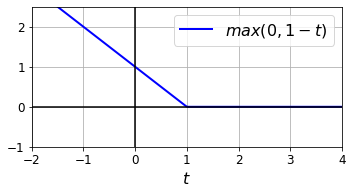

In [513]:
t = np.linspace(-2, 4, 200)
h = np.where(1 - t < 0, 0, 1 - t)  # max(0, 1-t)

plt.figure(figsize=(5,2.8))
plt.plot(t, h, "b-", linewidth=2, label="$max(0, 1 - t)$")
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks(np.arange(-1, 2.5, 1))
plt.xlabel("$t$", fontsize=16)
plt.axis([-2, 4, -1, 2.5])
plt.legend(loc="upper right", fontsize=16)
save_fig("hinge_plot")
plt.show()

온라인 커널 SVM을 구현하는 것도 가능. 예를 들어 Incremental and Decremental Support Vector Machine Learning

이나 Fast Kernel Classifier with Online and Active Learning 과 같은 논문에 기술된 

온라인 커널 SVM을 구현할 수 있음. 이 커널들은 매트랩(Matlab)이나 C++로 구현됨.

대규모의 비선형 문제라면 대신 신경망 알고리즘을 고려해보는 것이 좋음.

아니 좀 쉽게 설명해주면 어디 덧나나 명시적으로 커널트릭을 제대로 안 알려줘놓고 그냥 이러하다라고만 

해놓고 이론을 저따구로 설명하니까 알수가 없었지. 